In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import *
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
plt.rcParams['figure.figsize'] = [7, 7]
sns.set(style='darkgrid')
plt.rcParams['scatter.edgecolors'] = 'black'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
pd.set_option('display.unicode.east_asian_width', True)

In [62]:
iris_dataset = load_iris()
iris = pd.DataFrame(iris_dataset.data,
        columns=iris_dataset.feature_names)
labels = iris_dataset.target_names
iris.info()
print(iris.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [63]:
label = iris_dataset.target
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [64]:
scaler = StandardScaler()
iris = scaler.fit_transform(iris)
Features = pd.DataFrame(iris, columns=['SL', 'SW', 'PL', 'PW'])
print(Features.shape)

(150, 4)


In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(
    Features, label, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
#의사결정나무
#탐욕 알고리즘(greedy algorithm) divide and conquer
#결정 경계(decision boundary) 가 축에 평행하다는 한계점, 데이터를 어떤 선을 경계로 분류
#최적의 의사결정 나무를 찾는법은? 불순도(impurity)가 낮을수록 좋음 / 지니계수(Gini index) 가 0에 가까울수록 엔트로피도
#entropy(엔트로피) 정보이득이라고도 함, 데이터가 불순할수록 얻을 수 있는 정보량이 적어짐, 과적합(overfitting)문제
# 의사결정나무가 fully grown하면 과적합 문제 발생
#criterion : 분할 품질을 측정하는 기능 (default:gini)

In [68]:
#모델 학습
iris_Tree = DecisionTreeClassifier(criterion='entropy') 
iris_Tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [69]:
#학습정확도
iris_Tree.score(X_train, Y_train)

1.0

In [70]:
#테스트정확도
iris_Tree.score(X_test, Y_test)

0.9333333333333333

In [71]:
#결정트리 규칙 시각화
from sklearn import tree
from sklearn.tree import plot_tree

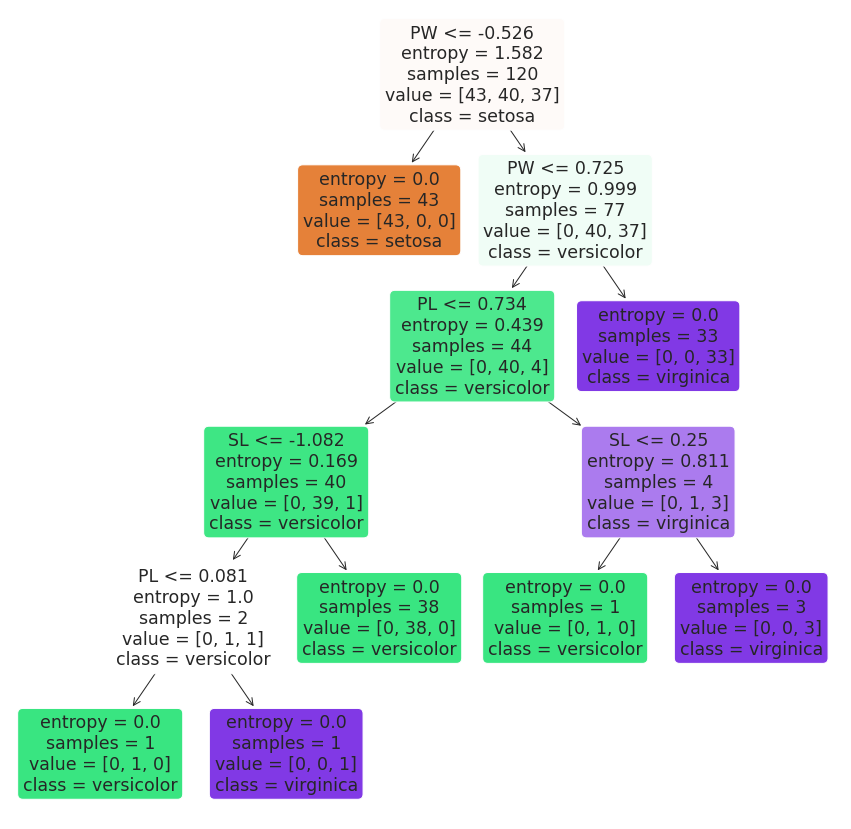

In [72]:
plt.figure(figsize=(15, 15))
plot_tree(iris_Tree, filled=True,
          rounded=True,
          class_names=['setosa', 'versicolor', 'virginica'],
          feature_names=Features.columns)
plt.show()

In [73]:
#가지치기 프로세스의 각 단계에서 유효알파와 해당하는 총 잎 불순물을 반환
#ccp_alpha값이 클수록 프루닝되는 노드 수가 증가, 
path = iris_Tree.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

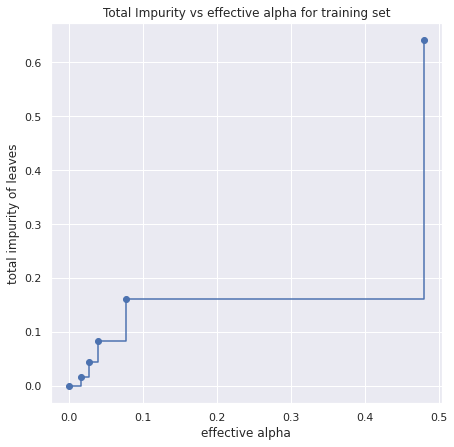

In [74]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [75]:
print(ccp_alphas)

[0.         0.01666667 0.0270426  0.03955364 0.07788598 0.47981498
 0.94129103]


In [76]:
#ccp_alphas[-1] 노드가 하나뿐인 사소한 트리이므로 최대 유효 알파 값이 제거...? 수업에선 왜 안했지? 굳이 안해도 되는건가?

In [77]:
#효과적인 알파를 사용하여 의사결정 트리를 훈련시킴, 
iris_Trees = []
for ccp_alpha in ccp_alphas:
    iris_Tree = DecisionTreeClassifier(
        random_state=868, ccp_alpha=ccp_alpha)
    iris_Tree.fit(X_train, Y_train)
    iris_Trees.append(iris_Tree)

In [78]:
#알파가 증가함에 따라 노드 수와 트리의 깊이가 감소,,

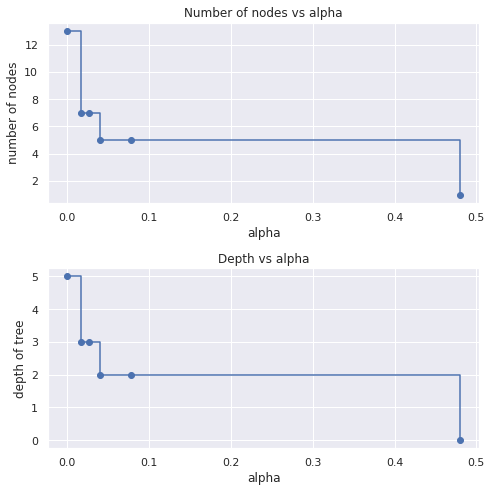

In [79]:
clfs = iris_Trees[:-1]
ccp_alphas2 = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas2, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas2, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

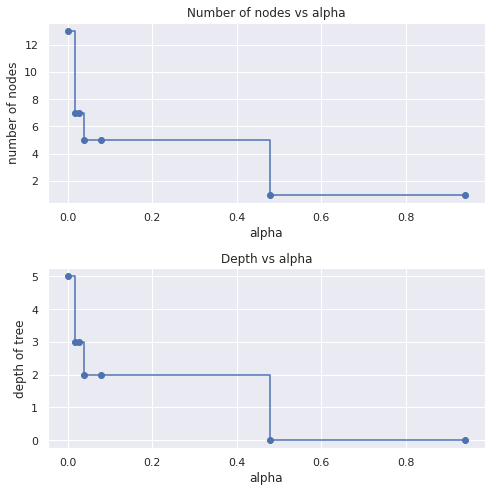

In [80]:
node_counts = [clf.tree_.node_count for clf in iris_Trees]
depth = [clf.tree_.max_depth for clf in iris_Trees]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [81]:
print(iris_Tree.score(X_train, Y_train))
print(type(iris_Tree.score(X_train, Y_train)))

0.35833333333333334
<class 'numpy.float64'>


In [82]:
#훈련 및 테스트 세트에 대한 정확도 vs 알파
train_score = [iris_Tree.score(X_train, Y_train
                        ) for iris_Tree in iris_Trees]
test_score = [iris_Tree.score(X_test, Y_test
                        ) for iris_Tree in iris_Trees]
print(train_score,)              
print(test_score)              

[1.0, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.35833333333333334, 0.35833333333333334]
[0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.23333333333333334, 0.23333333333333334]


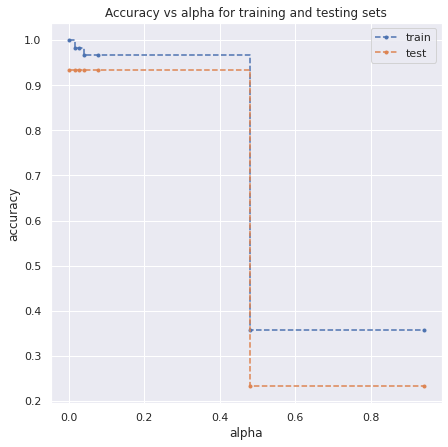

In [83]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_score, '--.', label='train',
        drawstyle='steps-post')
ax.plot(ccp_alphas, test_score, '--.', label='test',
        drawstyle='steps-post')
ax.legend()
plt.show()

In [84]:
iris_Tree = DecisionTreeClassifier(
        random_state=868, ccp_alpha=0.03142857)
iris_Tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.03142857, random_state=868)

In [85]:
iris_Tree.score(X_train, Y_train)

0.9833333333333333

In [86]:
iris_Tree.score(X_test, Y_test)

0.9333333333333333

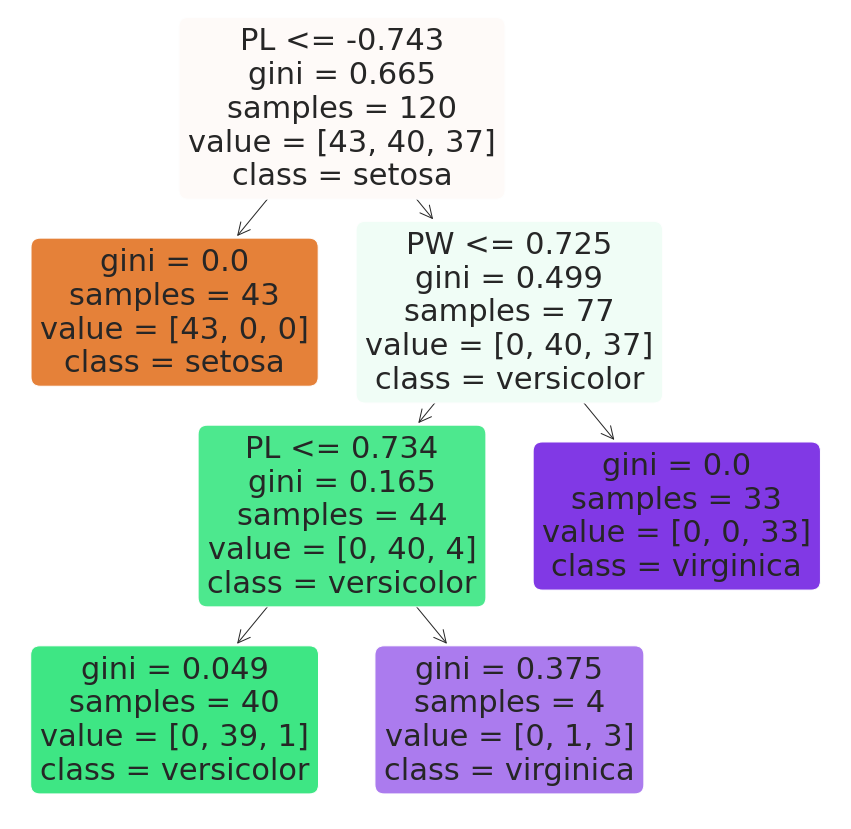

In [87]:
plt.figure(figsize=(15, 15))
plot_tree(iris_Tree, filled=True,
          rounded=True,
          class_names=['setosa', 'versicolor', 'virginica'],
          feature_names=Features.columns)
plt.show()

In [88]:
pd.DataFrame(confusion_matrix(Y_test, iris_Tree.predict(X_test)),
        columns=['P_setosa', 'P_versicolor', 'P_virginica'],
        index=['A_setosa', 'A_versicolor', 'A_virginica'])

,P_setosa,P_versicolor,P_virginica
A_setosa,7,0,0
A_versicolor,0,9,1
A_virginica,0,1,12


In [89]:
print(classification_report(Y_test, iris_Tree.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        13

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
for i in range(1,1000):
  X_train, X_test, Y_train, Y_test = train_test_split(
    Features, label, test_size=0.2, random_state=i)
  iris_Tree = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.008)
  iris_Tree.fit(X_train, Y_train)
  train_score = iris_Tree.score(X_train, Y_train)
  test_score = iris_Tree.score(X_test, Y_test)
  if test_score >= train_score:
    print('test: {}, train: {} random_state: {}'.format(test_score, train_score, i))

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(
    Features, label, test_size=0.2, random_state=3)
iris_Tree = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.008, random_state=2)
iris_Tree.fit(X_train, Y_train)
train_score = iris_Tree.score(X_train, Y_train)
test_score = iris_Tree.score(X_test, Y_test)
print('test: {}, train: {}'.format(test_score, train_score))

test: 1.0, train: 1.0


In [93]:
pd.DataFrame(confusion_matrix(Y_test, iris_Tree.predict(X_test)),
        columns=['P_setosa', 'P_versicolor', 'P_virginica'],
        index=['A_setosa', 'A_versicolor', 'A_virginica'])

,P_setosa,P_versicolor,P_virginica
A_setosa,10,0,0
A_versicolor,0,10,0
A_virginica,0,0,10


In [94]:
print(classification_report(Y_test, iris_Tree.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
#배깅한 데이터 부스트랩? 